In [1]:
using AbstractPlotting, CairoMakie, AbstractPlotting.MakieLayout
using NCDatasets
using Base64
using Printf
using AvailablePotentialEnergyFramework
using JLD

┌ Info: Precompiling AbstractPlotting [537997a7-5e4e-5d89-9595-2241ea00577e]
└ @ Base loading.jl:1278
┌ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
└ @ Base loading.jl:1278


In [2]:
data_dir = "$(ENV["SCRATCH"])/for_postprocessing/largencfiles/"
#	output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"
data_dir_apes = "/global/cscratch1/sd/aramreye/for_postprocessing/ApeBudgetOutputs2/"

"/global/cscratch1/sd/aramreye/for_postprocessing/ApeBudgetOutputs2/"

In [3]:
file_control = joinpath(ENV["SCRATCH"],"for_postprocessing/largencfiles/f5e-4_2km_1000km_control_nonudge_2d.nc")
file_homoSfc = joinpath(ENV["SCRATCH"],"for_postprocessing/largencfiles/f5e-4_2km_1000km_homoSfc_nonudge_2d.nc")
file_homoRad = joinpath(ENV["SCRATCH"],"for_postprocessing/largencfiles/f5e-4_2km_1000km_homoRad_nonudge_2d.nc")
file_homoRad_homoSfc = joinpath(ENV["SCRATCH"],"for_postprocessing/largencfiles/f5e-4_2km_1000km_homoRad_homoSfc_nonudge_2d.nc");

In [4]:
function read_data(filename,times)
    Dataset(filename) do ds
        psfc =variable(ds,"PSFC")[:,:,times] :: Array{Float32,3}
        u = variable(ds,"USFC")[:,:,times] :: Array{Float32,3}
        v = variable(ds,"VSFC")[:,:,times] :: Array{Float32,3}
        time = variable(ds,"time")[times] :: Array{Float32,1}
        sp = hypot.(u,v)
        #psfc = permutedims(psfc,(2,1,3))
        #sp = permutedims(sp,(2,1,3))
        psfc, sp, time
    end
end

read_data (generic function with 1 method)

In [5]:
time_slab = 1:2:1200
psfc_control,sp_control,times = read_data(file_control,time_slab)
psfc_homoSfc,sp_homoSfc,times = read_data(file_homoSfc,time_slab)
psfc_homoRad,sp_homoRad,times = read_data(file_homoRad,time_slab)
psfc_homoRad_homoSfc,sp_homoRad_homoSfc,times = read_data(file_homoRad_homoSfc,time_slab);

In [6]:
time_idx = Node(1)
psfc_1 = @lift(psfc_control[:,:,$time_idx])
sp_1 = @lift(sp_control[:,:,$time_idx])

psfc_2 = @lift(psfc_homoRad[:,:,$time_idx])
sp_2 = @lift(sp_homoRad[:,:,$time_idx])

psfc_3 = @lift(psfc_homoSfc[:,:,$time_idx])
sp_3 = @lift(sp_homoSfc[:,:,$time_idx])

psfc_4 = @lift(psfc_homoRad_homoSfc[:,:,$time_idx])
sp_4 = @lift(sp_homoRad_homoSfc[:,:,$time_idx]);

time_string = @lift(@sprintf "Pressure and wind speed at the surface at day %5.1f, no windspeed nudging" times[$time_idx])

Observable{String} with 0 listeners. Value:
"Pressure and wind speed at the surface at day   0.0, no windspeed nudging"

In [7]:
sp_1 == sp_3

false

In [8]:
timeindices = 1:length(times)

1:600

In [9]:
x = y = range(0,stop=1024,length=512)

0.0:2.003913894324853:1024.0

In [10]:
time_idx[] = 1

1

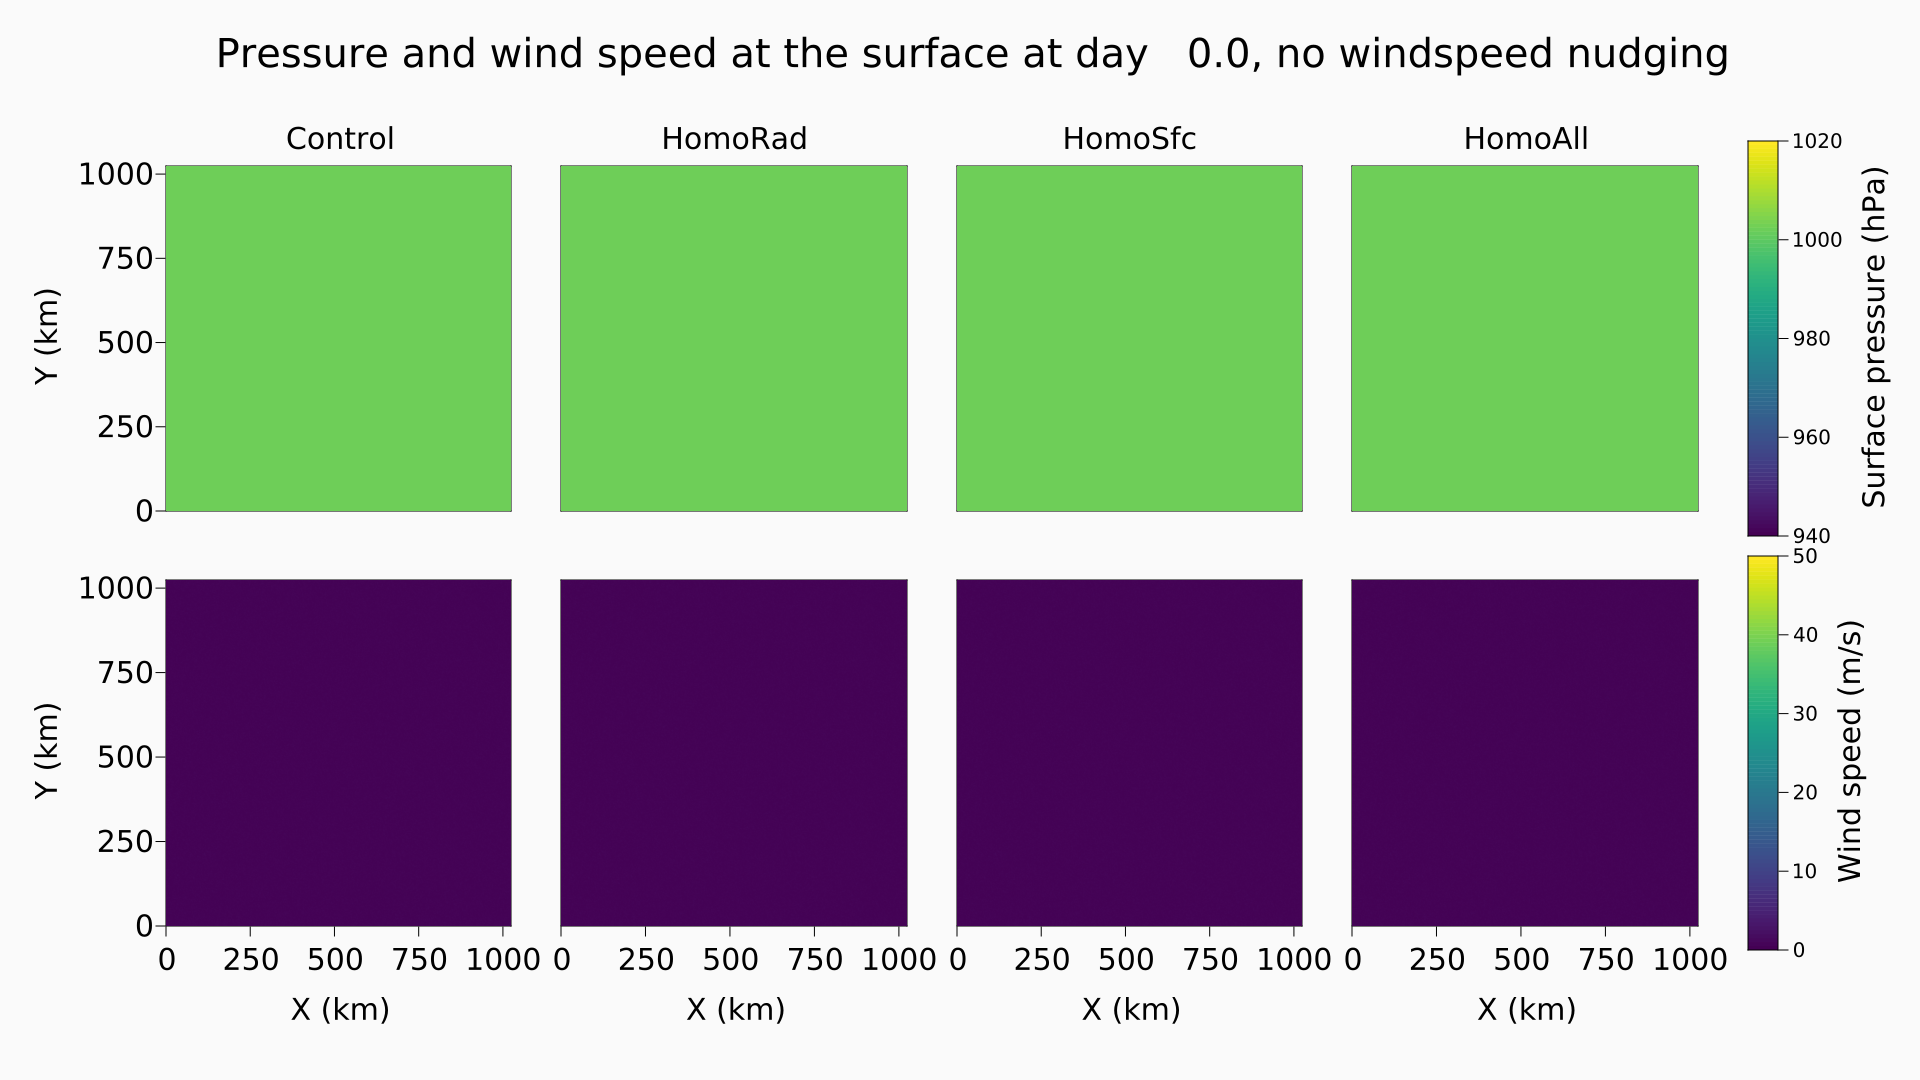

In [11]:
set_theme!(colgap=50,font=" DejaVu Sans")
#outer_padding = 30
#scene, layout = layoutscene(outer_padding, resolution = (1200, 700),backgroundcolor =RGBf0(0.98, 0.98, 0.98))
scene, layout = layoutscene(resolution = (1920,1080 ),backgroundcolor =RGBf0(0.98, 0.98, 0.98))
ax11 = layout[1, 1] = LAxis(scene, title = "Control", titlesize=30)
psfc11 = contour!(ax11,x,y, psfc_1, fillrange=true,colorrange = (940,1020))
ax12 = layout[1, 2] = LAxis(scene, title = "HomoRad", titlesize=30)
psfc12 = contour!(ax12,x,y, psfc_2,fillrange=true,colorrange = (940, 1020))
ax13 = layout[1, 3] = LAxis(scene, title = "HomoSfc", titlesize=30)
psfc13 = contour!(ax13,x,y, psfc_3,fillrange=true,colorrange = (940,1020))
ax14 = layout[1, 4] = LAxis(scene, title = "HomoAll", titlesize=30)
psfc14 = contour!(ax14,x,y, psfc_4,fillrange=true,colorrange = (940,1020))
##Colorbar
cbar = layout[1,5] = LColorbar(scene, psfc11, label = "Surface pressure (hPa)",labelsize = 30)
cbar.width=30
### Lower row
ax21 = layout[2, 1] = LAxis(scene)
line21 = contour!(ax21,x,y, sp_1,fillrange=true,colorrange = (0,50))
ax22 = layout[2, 2] = LAxis(scene)
line22 = contour!(ax22,x,y, sp_2,fillrange=true,colorrange = (0,50))
ax23 = layout[2, 3] = LAxis(scene)
line23 = contour!(ax23,x,y, sp_3,fillrange=true,colorrange = (0,50))
ax24 = layout[2, 4] = LAxis(scene)
line24 = contour!(ax24,x,y, sp_4,fillrange=true,colorrange = (0,50))
cbar = layout[2,5] = LColorbar(scene, line21, label = "Wind speed (m/s)",labelsize = 30)
cbar.width=30

ax11.aspect = AxisAspect(1)
ax12.aspect = AxisAspect(1)
ax13.aspect = AxisAspect(1)
ax14.aspect = AxisAspect(1)
ax21.aspect = AxisAspect(1)
ax22.aspect = AxisAspect(1)
ax23.aspect = AxisAspect(1)
ax24.aspect = AxisAspect(1)

ax11.ylabel = "Y (km)"
ax21.ylabel = "Y (km)"

ax21.xlabel = "X (km)"
ax22.xlabel = "X (km)"
ax23.xlabel = "X (km)"
ax24.xlabel = "X (km)"

ax11.ylabelsize = 30
ax21.ylabelsize = 30

ax21.xlabelsize = 30
ax22.xlabelsize = 30
ax23.xlabelsize = 30
ax24.xlabelsize = 30

ax11.yticklabelsize = 30
ax21.yticklabelsize = 30

ax21.xticklabelsize = 30
ax22.xticklabelsize = 30
ax23.xticklabelsize = 30
ax24.xticklabelsize = 30

linkaxes!(ax11, ax12,ax13,ax21,ax22,ax23)

tightlimits!.((ax11,ax12,ax13,ax14,ax21,ax22,ax23,ax24))

hideydecorations!(ax12, grid = false)
hideydecorations!(ax13, grid = false)
hideydecorations!(ax14, grid = false)
hideydecorations!(ax22, grid = false)
hideydecorations!(ax23, grid = false)
hideydecorations!(ax24, grid = false)

hidexdecorations!(ax11, grid = false)
hidexdecorations!(ax12, grid = false)
hidexdecorations!(ax13, grid = false)
hidexdecorations!(ax14, grid = false)

supertitle = layout[0, :] = LText(scene, time_string,
    textsize = 40)
scene

In [12]:
record(scene, joinpath(output_dir, "time_animation_2km_nonudge.mp4"), timeindices; framerate = 10, compression = 0) do t
    time_idx[] = t 
end

"/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/time_animation_2km_nonudge.mp4"

In [ ]:
contour